#### Librerias


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import seaborn as sns

import yfinance as yf

from pypfopt import EfficientFrontier, expected_returns
from pypfopt import risk_models
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.risk_models import CovarianceShrinkage

import quantstats as qs

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Funciones


###### _P1_


In [3]:
"""# Función para calcular un portafolio con límite de riesgo fijo
def calculate_risk_limit(prices, risk_limit=0.02, save_weights=False):
    vol = prices.pct_change().rolling(window=30).std() * np.sqrt(252)
    weights = vol.mean(axis=1).apply(lambda x: 0.6 if x < risk_limit else 0.4)
    if save_weights:
        return
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)
"""
"""# Optimización para maximizar el ratio Sharpe
def optimize_max_sharpe(returns, cov_matrix, risk_free_rate=0.0, save_weights=False):
    num_assets = len(returns)
    def neg_sharpe_ratio(weights):
        p_return = np.dot(weights, returns)
        p_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return - (p_return - risk_free_rate) / p_volatility
    
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets],
                          method='SLSQP', bounds=bounds, constraints=constraints)
    
    if save_weights:
        return result.x
    return result
"""

"# Optimización para maximizar el ratio Sharpe\ndef optimize_max_sharpe(returns, cov_matrix, risk_free_rate=0.0, save_weights=False):\n    num_assets = len(returns)\n    def neg_sharpe_ratio(weights):\n        p_return = np.dot(weights, returns)\n        p_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))\n        return - (p_return - risk_free_rate) / p_volatility\n    \n    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})\n    bounds = tuple((0, 1) for asset in range(num_assets))\n    \n    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets],\n                          method='SLSQP', bounds=bounds, constraints=constraints)\n    \n    if save_weights:\n        return result.x\n    return result\n"

###### Originales

In [4]:
"""
# Función para calcular el portafolio con máximo Sharpe (devuelve valores ponderados)
def calculate_max_sharpe(prices, risk_free=0.05, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_sharpe(risk_free_rate=risk_free)
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)

# Función para calcular el portafolio de mínima volatilidad
def calculate_min_volatility(prices, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.min_volatility()
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)


# Función para calcular el portafolio de máximo rendimiento esperado
def calculate_max_return(prices, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_quadratic_utility()
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)

# Funcion para calcular un portafolio de pesos iguales con pyportfolioopt
def calculate_equal_weights(prices, save_weights=False):
    prices = prices.dropna()
    num_assets = len(prices.columns)
    # Calcular pesos iguales
    weight = 1.0 / num_assets
    weights = {asset: weight for asset in prices.columns}
    if save_weights:
        return weights
    return prices.mul(weights, axis=1).sum(axis=1)


# Funcion para calculrar portafolio con un riesgo fijo usando pyportfolioopt
def calculate_risk_limit(prices, risk_limit=0.02, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(risk_limit)
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)
"""

'\n# Función para calcular el portafolio con máximo Sharpe (devuelve valores ponderados)\ndef calculate_max_sharpe(prices, risk_free=0.05, save_weights=False):\n    prices = prices.dropna()    \n    mu = expected_returns.mean_historical_return(prices)\n    S = risk_models.sample_cov(prices)\n    ef = EfficientFrontier(mu, S)\n    ef.max_sharpe(risk_free_rate=risk_free)\n    weights = ef.clean_weights()\n    if save_weights:\n        return weights\n    # Multiplica precios históricos por los pesos para obtener valores ponderados\n    return prices.mul(weights, axis=1).sum(axis=1)\n\n# Función para calcular el portafolio de mínima volatilidad\ndef calculate_min_volatility(prices, save_weights=False):\n    prices = prices.dropna()    \n    mu = expected_returns.mean_historical_return(prices)\n    S = risk_models.sample_cov(prices)\n    ef = EfficientFrontier(mu, S)\n    ef.min_volatility()\n    weights = ef.clean_weights()\n    if save_weights:\n        return weights\n    # Multiplica p

###### Portafolios y metricas

In [5]:
""" #! Revisar calculo de rendimientos esperados y rendimiento acumulado """ 

def calculate_max_sharpe(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_sharpe(risk_free_rate=risk_free)
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_min_volatility(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.min_volatility()
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_max_return(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_quadratic_utility()
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_equal_weights(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    num_assets = len(prices.columns)
    weights = {asset: 1.0 / num_assets for asset in prices.columns}
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_risk_limit(prices, risk_free=0.05, risk_limit=0.20, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(risk_limit)
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    if save_weights:
        return weights

    return portfolio_returns

# Función para calcular todos los indicadores
def calculate_metrics(returns, date_index, risk_free):
    cumulative_return = (returns + 1).cumprod() - 1
    cumulative_return = cumulative_return.iloc[-1]
    cagr = calculate_cagr(returns)
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = (returns.mean() * 252 - risk_free) / volatility
    sortino_ratio = calculate_sortino(returns, risk_free)
    omega_ratio = calculate_omega(returns, risk_free)
    max_drawdown = calculate_max_drawdown(returns)
    max_drawdown_duration = calculate_drawdown_duration(returns)

    return {
        "start_period": date_index[0].strftime("%Y-%m-%d"),
        "end_period": date_index[-1].strftime("%Y-%m-%d"),
        "risk_free_rate %": risk_free * 100,
        "expected_return %": (returns.mean() * 252)*100,
        "volatility %": volatility*100,
        "cumulative_return %": cumulative_return*100,
        "cagr %": cagr*100,
        "sharpe_ratio": sharpe_ratio,
        "sortino_ratio": sortino_ratio,
        "omega_ratio": omega_ratio,
        "max_drawdown": max_drawdown*100,
        "max_drawdown_duration": max_drawdown_duration
    }

def calculate_cagr(returns):
    n_periods = len(returns) / 252
    cumulative_return = (returns + 1).cumprod() - 1
    cumulative_return = cumulative_return.iloc[-1]
    return ((1 + cumulative_return) ** (1 / n_periods) - 1)

def calculate_sortino(returns, risk_free):
    downside_returns = returns[returns < risk_free / 252]
    expected_return = returns.mean() * 252
    downside_deviation = np.std(downside_returns) * np.sqrt(252)
    return (expected_return - risk_free) / downside_deviation

def calculate_omega(returns, risk_free):
    threshold_return = risk_free / 252
    gain = returns[returns > threshold_return].sum()
    loss = -returns[returns <= threshold_return].sum()
    return gain / loss if loss != 0 else np.inf

def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calculate_drawdown_duration(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    in_drawdown = drawdown != 0
    drawdown_duration = in_drawdown.groupby((in_drawdown != in_drawdown.shift()).cumsum()).cumsum()
    return drawdown_duration.max()

# Función para calcular las métricas para todos los portafolios y activos
def calculate_indicators_for_all_portfolios(prices, risk_free=0.05, risk_limit=0.2,include_assets=False):
    portafolios = {
        "Max_Sharpe": calculate_max_sharpe(prices, risk_free=risk_free, index_calcs=True),
        "Min_Volatility": calculate_min_volatility(prices, risk_free=risk_free, index_calcs=True),
        "Max_Return": calculate_max_return(prices, risk_free=risk_free, index_calcs=True),
        "Equal_Weight": calculate_equal_weights(prices, risk_free=risk_free, index_calcs=True),
        "Risk_Limit": calculate_risk_limit(prices, risk_limit=risk_limit,risk_free=risk_free, index_calcs=True)
    }
    
    if include_assets:
        asset_indicators = {}
        for asset in prices.columns:
            asset_returns = prices[asset].pct_change().dropna()
            asset_indicators[asset] = calculate_metrics(asset_returns, prices.index, risk_free)
        portafolios.update(asset_indicators)

    df_indicators = pd.DataFrame(portafolios)
    return df_indicators

###### Portfolio generation

In [6]:

# Función para agregar activos y portafolios a un solo DataFrame
def generate_portfolio_df(data, include_sharpe=True, include_min_vol=True, include_max_return=True, include_equal_weight=True, include_risk_limit=True, risk_free=0.05, risk_limit=0.02, include_assets=False, save_weights=False):
    # Crear una copia del DataFrame original
    portfolio_df = data.copy().pct_change().dropna()

    # Calcular y añadir las estrategias seleccionadas al DataFrame
    if include_sharpe:
        portfolio_df['Max_Sharpe'] = calculate_max_sharpe(data, risk_free=risk_free, save_weights=save_weights)
    if include_min_vol:
        portfolio_df['Min_Volatility'] = calculate_min_volatility(data, save_weights=save_weights)
    if include_max_return:
        portfolio_df['Max_Return'] = calculate_max_return(data, save_weights=save_weights)
    if include_equal_weight:
        portfolio_df['Equal_Weight'] = calculate_equal_weights(data, save_weights=save_weights)
    if include_risk_limit:
        #portfolio_df['Risk_Limit'] = calculate_risk_limit(data, risk_limit=risk_limit, save_weights=save_weights)
        portfolio_df['Risk_Limit'] = calculate_risk_limit(data, risk_limit=risk_limit, save_weights=save_weights)
# para hacer que solo regrese los portafolios y no los activos se usa el siguiente codigo
#     # Eliminar las columnas de activos
    if not include_assets:
        portfolio_df = portfolio_df.drop(data.columns, axis=1)
    return portfolio_df

###### Add cripto to portafolio

In [7]:
# Funcion para agregar criptos a portafolios tradicionales
def add_cripto(tradicionales, cripto, cry_list):
    # Asegurarse de que ambos DataFrames tengan índices de tipo datetime
    tradicionales.index = pd.to_datetime(tradicionales.index)
    cripto.index = pd.to_datetime(cripto.index)
    
    # añadir un try para evitar errores
    try:
        # Verificar que las criptomonedas seleccionadas existan en el DataFrame
        cry_list = [crypto for crypto in cry_list if crypto in cripto.columns]
    except:
        print('Error: cripto no es un DataFrame')
    # Verificar que las criptomonedas seleccionadas existan en el DataFrame
    
    # Seleccionar solo las criptomonedas de la lista
    criptos_seleccionadas = cripto[cry_list]
    
    # Combinar los DataFrames, alineando por fecha
    combinado = pd.merge(tradicionales, criptos_seleccionadas, left_index=True, right_index=True, how='inner').dropna()
    
    return combinado

###### Frontera Eficiente

In [8]:
# Función para generar combinaciones aleatorias de portafolios
def weight_portfolios(activos, iteraciones=10000, min_weight=0.01):
    max_weight = 1 - (len(activos) * min_weight)
    portfolios = []
    for _ in range(iteraciones):
        weights = np.random.dirichlet(np.ones(len(activos)), size=1)[0]
        weights = np.clip(weights, min_weight, max_weight)
        portfolios.append(weights)
    portfolios = pd.DataFrame(portfolios, columns=activos)
    return portfolios

# Función para calcular y obtener métricas de portafolios específicos
def calcular_portafolios_especificos(returns, risk_free=0.05, risk_limit=0.20):
    mu = expected_returns.mean_historical_return(returns)
    S = risk_models.sample_cov(returns)
    ef = EfficientFrontier(mu, S)

    # Portafolio de máximo Sharpe
    ef.max_sharpe(risk_free_rate=risk_free)
    weights_sharpe = ef.clean_weights()
    performance_sharpe = ef.portfolio_performance(risk_free_rate=risk_free)

    # Portafolio de mínima volatilidad
    ef_min_vol = EfficientFrontier(mu, S)
    ef_min_vol.min_volatility()
    weights_min_vol = ef_min_vol.clean_weights()
    performance_min_vol = ef_min_vol.portfolio_performance()

    # Portafolio de pesos iguales
    n_assets = len(mu)
    weights_equal = np.array([1/n_assets] * n_assets)
    ret_equal = np.dot(weights_equal, mu)
    vol_equal = np.sqrt(np.dot(weights_equal.T, np.dot(S, weights_equal)))
    sharpe_equal = (ret_equal - risk_free) / vol_equal
    performance_equal = (ret_equal, vol_equal, sharpe_equal)
    
    # Portafolio de máxima utilidad cuadrática
    ef_max_utility = EfficientFrontier(mu, S)
    ef_max_utility.max_quadratic_utility()
    weights_max_utility = ef_max_utility.clean_weights()
    performance_max_utility = ef_max_utility.portfolio_performance()

    # Portafolio de riesgo fijo
    ef_risk_limit = EfficientFrontier(mu, S)
    ef_risk_limit.efficient_risk(risk_limit)
    weights_risk_limit = ef_risk_limit.clean_weights()
    performance_risk_limit = ef_risk_limit.portfolio_performance()
    
    # Métricas de los activos individuales
    performance_activos = []
    for i, asset in enumerate(returns.columns):
        weights_asset = np.zeros(n_assets)
        weights_asset[i] = 1
        ret_asset = np.dot(weights_asset, mu)
        vol_asset = np.sqrt(np.dot(weights_asset.T, np.dot(S, weights_asset)))
        sharpe_asset = (ret_asset - risk_free) / vol_asset
        performance_activos.append((asset, ret_asset, vol_asset, sharpe_asset))

    return {
        "sharpe": {"weights": weights_sharpe, "performance": performance_sharpe},
        "min_vol": {"weights": weights_min_vol, "performance": performance_min_vol},
        "equal": {"weights": weights_equal, "performance": performance_equal},
        "max_utility": {"weights": weights_max_utility, "performance": performance_max_utility},
        "risk_limit": {"weights": weights_risk_limit, "performance": performance_risk_limit},
        "activos": performance_activos
    }

    # Función para calcular las métricas de los portafolios generados aleatoriamente
def calcular_metricas_aleatorias(portfolios, mu, S, risk_free=0.05):
    expected_returns_all = portfolios.dot(mu)
    portfolio_volatility = np.sqrt(np.diag(portfolios.dot(S).dot(portfolios.T)))
    sharpe_ratios = (expected_returns_all - risk_free) / portfolio_volatility
    return expected_returns_all, portfolio_volatility, sharpe_ratios

"""
# Función para graficar la frontera eficiente y los portafolios específicos
def graficar_frontera_eficiente(data, iteraciones=10000, risk_free=0.05, min_weight=0.01, risk_limit=0.20, title='Portafolio'):
    data = data.dropna()
    activos = data.columns.tolist()
    portfolios = weight_portfolios(activos, iteraciones, min_weight=min_weight)

    mu = expected_returns.mean_historical_return(data)
    S = risk_models.sample_cov(data)

    expected_returns_all, portfolio_volatility, sharpe_ratios = calcular_metricas_aleatorias(portfolios, mu, S, risk_free)

    # Calcular portafolios específicos
    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit)
    
    # Preparar datos para la gráfica
    rendimiento_sharpe = portafolios_especificos["sharpe"]["performance"][0]
    riesgo_sharpe = portafolios_especificos["sharpe"]["performance"][1]
    # Calcular sharpe de maximo sharpe portafolio
    sharpe_sharpe = (rendimiento_sharpe - risk_free) / riesgo_sharpe

    rendimiento_min_var = portafolios_especificos["min_vol"]["performance"][0]
    riesgo_min_var = portafolios_especificos["min_vol"]["performance"][1]
    
    rendimiento_max_utility = portafolios_especificos["max_utility"]["performance"][0]
    riesgo_max_utility = portafolios_especificos["max_utility"]["performance"][1]

    rendimiento_igual = portafolios_especificos["equal"]["performance"][0]
    riesgo_igual = portafolios_especificos["equal"]["performance"][1]

    rendimiento_risk_limit = portafolios_especificos["risk_limit"]["performance"][0]
    riesgo_risk_limit = portafolios_especificos["risk_limit"]["performance"][1]

    # Graficar
    plt.figure(figsize=(12, 8))
    plt.scatter(portfolio_volatility, expected_returns_all*100, c=sharpe_ratios, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Ratio de Sharpe', pad=0.1) 

    # Mejorar el estilo de la gráfica
    plt.xlabel('Volatilidad (Riesgo del Portafolio)', fontsize=12, fontweight='bold')
    plt.ylabel('Rendimiento Esperado del Portafolio % (anual)', fontsize=12, fontweight='bold')
    plt.suptitle(title, fontsize=18, fontweight='bold')
    plt.title('Gráfica de Dispersión: Rendimiento vs. Volatilidad', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Añadir el punto del portafolio de mínima varianza en rojo
    plt.scatter(riesgo_min_var, rendimiento_min_var*100, color='#FF3030', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Mínima Varianza')

    # Añadir el punto del portafolio de pesos iguales en morado
    plt.scatter(riesgo_igual, rendimiento_igual*100, color='#8B008B', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio Equal Weight')

    # Añadir el punto del portafolio de máximo Sharpe en azul
    plt.scatter(riesgo_sharpe, rendimiento_sharpe*100, color='#00FFFF', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máximo Sharpe')
    
    # Añadir el punto del portafolio de máxima utilidad cuadrática en verde
    plt.scatter(riesgo_max_utility, rendimiento_max_utility*100, color='#76EE00', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máxima Utilidad Cuadrática')

    # Añadir el punto del portafolio de riesgo fijo en naranja
    plt.scatter(riesgo_risk_limit, rendimiento_risk_limit*100, color='#FFD700', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Riesgo Fijo')

    # Añadir los puntos de los activos individuales con etiquetas en la gráfica
    for (asset, ret_asset, vol_asset, sharpe_asset) in portafolios_especificos["activos"]:
        plt.scatter(vol_asset, ret_asset*100, marker='o', s=35, edgecolors='black', facecolors='none')
        #plt.text(vol_asset, (ret_asset*100), asset, fontsize=8, fontweight='bold', ha='center', color='#0A0A0A')

    plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.01, 0.99)) 
    plt.text(0.5, 0.96, f'Tasa libre de riesgo: {risk_free*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir otro texto que muestre el ratio sharpe mas grande y el portafoio al que pertenece
    plt.text(0.5, 0.93, f'Mejor Ratio de Sharpe: {sharpe_sharpe:.2f}', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir texto con minimo riesgo, y maximo rendimiento
    #plt.text(0.5, 0.90, f'Riesgo Mínimo: {riesgo_min_var*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Texto con pesos de portafolio maximo sharpe
    #weights_sharpe = portafolios_especificos["sharpe"]["weights"]
    #texto_pesos_sharpe = f'Pesos del Portafolio de Máximo Sharpe:\n{weights_sharpe}'
    #plt.text(0.1, 0.05, texto_pesos_sharpe, transform=plt.gca().transAxes, fontsize=10, fontweight='bold', color='#363636')
    
    
    #plt.text(0.5, 0.87, f'Rendimiento Máximo: {rendimiento_max_utility*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')

    plt.show()
    
    """

'\n# Función para graficar la frontera eficiente y los portafolios específicos\ndef graficar_frontera_eficiente(data, iteraciones=10000, risk_free=0.05, min_weight=0.01, risk_limit=0.20, title=\'Portafolio\'):\n    data = data.dropna()\n    activos = data.columns.tolist()\n    portfolios = weight_portfolios(activos, iteraciones, min_weight=min_weight)\n\n    mu = expected_returns.mean_historical_return(data)\n    S = risk_models.sample_cov(data)\n\n    expected_returns_all, portfolio_volatility, sharpe_ratios = calcular_metricas_aleatorias(portfolios, mu, S, risk_free)\n\n    # Calcular portafolios específicos\n    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit)\n    \n    # Preparar datos para la gráfica\n    rendimiento_sharpe = portafolios_especificos["sharpe"]["performance"][0]\n    riesgo_sharpe = portafolios_especificos["sharpe"]["performance"][1]\n    # Calcular sharpe de maximo sharpe portafolio\n    sharpe_sharpe = (rendimiento_sharpe - 

In [9]:
# Función para graficar la frontera eficiente y los portafolios específicos
def graficar_frontera_eficiente(data, iteraciones=10000, risk_free=0.05, min_weight=0.01, risk_limit=0.20, title='Portafolio'):
    data = data.dropna()
    activos = data.columns.tolist()
    portfolios = weight_portfolios(activos, iteraciones, min_weight=min_weight)

    mu = expected_returns.mean_historical_return(data)
    S = risk_models.sample_cov(data)

    expected_returns_all, portfolio_volatility, sharpe_ratios = calcular_metricas_aleatorias(portfolios, mu, S, risk_free)

    # Calcular portafolios específicos
    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit)
    
    # Preparar datos para la gráfica
    rendimiento_sharpe = portafolios_especificos["sharpe"]["performance"][0]
    riesgo_sharpe = portafolios_especificos["sharpe"]["performance"][1]
    # Calcular sharpe de maximo sharpe portafolio
    sharpe_sharpe = (rendimiento_sharpe - risk_free) / riesgo_sharpe

    rendimiento_min_var = portafolios_especificos["min_vol"]["performance"][0]
    riesgo_min_var = portafolios_especificos["min_vol"]["performance"][1]
    
    rendimiento_max_utility = portafolios_especificos["max_utility"]["performance"][0]
    riesgo_max_utility = portafolios_especificos["max_utility"]["performance"][1]

    rendimiento_igual = portafolios_especificos["equal"]["performance"][0]
    riesgo_igual = portafolios_especificos["equal"]["performance"][1]

    rendimiento_risk_limit = portafolios_especificos["risk_limit"]["performance"][0]
    riesgo_risk_limit = portafolios_especificos["risk_limit"]["performance"][1]

    # Calcular la frontera eficiente
    ef = EfficientFrontier(mu, S)
    frontier_returns = np.linspace(rendimiento_min_var, rendimiento_max_utility*(1-1e-6), 100)  # Adjusted line
    frontier_volatility = []
    for ret in frontier_returns:
        ef.efficient_return(target_return=ret)
        frontier_volatility.append(ef.portfolio_performance()[1])

    
    # Graficar
    plt.figure(figsize=(12, 8))
    plt.scatter(portfolio_volatility, expected_returns_all*100, c=sharpe_ratios, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Ratio de Sharpe', pad=0.1) 

    # Mejorar el estilo de la gráfica
    plt.xlabel('Volatilidad (Riesgo del Portafolio)', fontsize=12, fontweight='bold')
    plt.ylabel('Rendimiento Esperado del Portafolio % (anual)', fontsize=12, fontweight='bold')
    plt.suptitle(title, fontsize=18, fontweight='bold')
    plt.title('Gráfica de Dispersión: Rendimiento vs. Volatilidad', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Añadir como linea la curva de frontera eficiente
    plt.plot(frontier_volatility, frontier_returns*100, 'r--', linewidth=2, alpha = 0.7,label='Frontera Eficiente')

    
    # Añadir el punto del portafolio de mínima varianza en rojo
    plt.scatter(riesgo_min_var, rendimiento_min_var*100, color='#FF3030', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Mínima Varianza')

    # Añadir el punto del portafolio de pesos iguales en morado
    plt.scatter(riesgo_igual, rendimiento_igual*100, color='#8B008B', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio Equal Weight')

    # Añadir el punto del portafolio de máximo Sharpe en azul
    plt.scatter(riesgo_sharpe, rendimiento_sharpe*100, color='#00FFFF', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máximo Sharpe')
    
    # Añadir el punto del portafolio de máxima utilidad cuadrática en verde
    plt.scatter(riesgo_max_utility, rendimiento_max_utility*100, color='#76EE00', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máxima Utilidad Cuadrática')

    # Añadir el punto del portafolio de riesgo fijo en naranja
    plt.scatter(riesgo_risk_limit, rendimiento_risk_limit*100, color='#FFD700', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Riesgo Fijo')

    # Linea punteada horizontal que empiece en portafolio de minima varianza
    plt.axhline(y=rendimiento_min_var*100, color='red', alpha= 0.7, linestyle='dotted', label='Frontera Minima Varianza')
    
    # Añadir los puntos de los activos individuales con etiquetas en la gráfica
    for (asset, ret_asset, vol_asset, sharpe_asset) in portafolios_especificos["activos"]:
        plt.scatter(vol_asset, ret_asset*100, marker='o', s=35, edgecolors='black', facecolors='none')
        #plt.text(vol_asset, (ret_asset*100), asset, fontsize=8, fontweight='bold', ha='center', color='#0A0A0A')

    plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.01, 0.99)) 
    plt.text(0.5, 0.96, f'Tasa libre de riesgo: {risk_free*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir otro texto que muestre el ratio sharpe mas grande y el portafoio al que pertenece
    plt.text(0.5, 0.93, f'Mejor Ratio de Sharpe: {sharpe_sharpe:.2f}', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir texto con minimo riesgo, y maximo rendimiento
    #plt.text(0.5, 0.90, f'Riesgo Mínimo: {riesgo_min_var*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Texto con pesos de portafolio maximo sharpe
    #weights_sharpe = portafolios_especificos["sharpe"]["weights"]
    #texto_pesos_sharpe = f'Pesos del Portafolio de Máximo Sharpe:\n{weights_sharpe}'
    #plt.text(0.1, 0.05, texto_pesos_sharpe, transform=plt.gca().transAxes, fontsize=10, fontweight='bold', color='#363636')
    
    
    #plt.text(0.5, 0.87, f'Rendimiento Máximo: {rendimiento_max_utility*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')

    plt.show()

###### Grafica pastel

In [10]:
def plot_portfolio_pies(data, risk_free=0.05, risk_limit=0.20):
    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit)
    
    portafolios = ["sharpe", "min_vol", "equal", "max_utility", "risk_limit"]
    n_portfolios = len(portafolios)
    
    # Configurar el estilo de seaborn
    sns.set_style("whitegrid")
    sns.set_palette("husl", n_colors=len(data.columns))
    
    # Crear un mapa de colores consistente para los activos
    color_map = dict(zip(data.columns, sns.color_palette("tab10", n_colors=len(data.columns))))
    
    grafica= fig, axs = plt.subplots(1, n_portfolios, figsize=(20, 8))
    fig.suptitle('Distribución de Activos en Diferentes Portafolios', fontsize=16, fontweight='bold')

    for i, portfolio in enumerate(portafolios):
        weights = portafolios_especificos[portfolio]['weights']
        
        if isinstance(weights, dict):
            assets = list(weights.keys())
            values = list(weights.values())
        else:
            assets = data.columns
            values = weights
        
        # Ordenar los valores y activos de mayor a menor
        sorted_indices = np.argsort(values)[::-1]
        sorted_values = np.array(values)[sorted_indices]
        sorted_assets = np.array(assets)[sorted_indices]
        
        # Crear el gráfico de pastel
        colors = [color_map[asset] for asset in sorted_assets]
        wedges, _, autotexts = axs[i].pie(sorted_values, autopct='%1.1f%%', 
                                          startangle=90, colors=colors, 
                                          wedgeprops=dict(width=0.6, edgecolor='white'))
        
        # Ajustar el texto dentro de los wedges
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        axs[i].set_title(f'Portafolio: {portfolio.capitalize()}', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    
    # Añadir una única leyenda debajo del título principal
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color_map[asset], edgecolor='none') for asset in data.columns]
    fig.legend(legend_elements, data.columns, loc='upper center', bbox_to_anchor=(0.5, 0.92),
               ncol=len(data.columns), fontsize=10, title='Activos', title_fontsize=12)
    
    plt.subplots_adjust(top=0.8, bottom=0.1)
    

###### _Drawdown y Rendimientos acumulados_


In [11]:
def plot_performance_and_drawdown(returns, benchmark='BTC'):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Calcular drawdowns
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("husl", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    #csfont = {'fontname':'Times New Roman'}

    # Crear la figura y los subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
    fig.suptitle('Rendimiento y Drawdown de Activos',fontsize=20, fontweight='bold')

    # Subplot 1: Rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax1.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax1.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax1.set_title('Rendimiento Acumulado (escala logarítmica)', fontsize=14, fontweight='bold')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)*100:.0f}%' #if y < 2 else f'{y-1:.0f}x'

    ax1.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
    
    # Crear escala personalizada para el eje Y
    yticks = [1, 2, 3.5, 6, 11, 26, 51, 101, 151, 201, 251,301]
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([percent_formatter(y, 0) for y in yticks])

    # Ajustar los límites del eje Y
    ax1.set_ylim(bottom=max(0.1, 1 + cumulative_returns.min().min()), top=1 + cumulative_returns.max().max())

    # Añadir líneas horizontales en el subplot de rendimiento
    for y in yticks:
        ax1.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Subplot 2: Drawdown
    for col in drawdown.columns:
        ax.fill_between(drawdown.index, drawdown[col], 0, label=col, color=color_map[col], alpha=0.7, linewidth=0.8, edgecolor='black')
        # Hacerlo con lineas en vez de 
        #?ax2.plot(drawdown.index, drawdown[col], label=col, color=color_map[col], linewidth=2)    
    ax2.set_ylabel('Drawdown %', fontsize=12)
    ax2.set_title('Drawdown', fontsize=14, fontweight='bold')
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.set_ylim(-1, 0)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # Añadir línea de drawdown medio del benchmark
    mean_drawdown = drawdown[benchmark].mean()
    ax2.axhline(y=mean_drawdown, color='red', linestyle='--', linewidth=2)
    ax2.text(drawdown.index[-1], mean_drawdown, f'Drawdown medio de {benchmark}: {mean_drawdown:.2%}', 
             verticalalignment='bottom', horizontalalignment='right', color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()

In [12]:
"""def plot_cumulative_returns(data):
    # Calcular rendimientos diarios y acumulados
    returns = data.pct_change()
    cumulative_returns = (1 + returns).cumprod() - 1

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("tab10", n_colors=len(data.columns))
    color_map = dict(zip(data.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))
    #fig.suptitle(title, fontsize=16, fontweight='bold')

    # Rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax.set_title('Rendimiento Acumulado (escala logarítmica)', fontsize=12, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
   # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)*100:.0f}%'

    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))  
    # Crear escala personalizada para el eje Y
    #[1, 2, 3.5, 6, 11, 26, 51, 101, 151, 201, 251, 301]
    yticks = [1,1.5,2,3,4,5]

    ax.set_yticks(yticks)
    ax.set_yticklabels([percent_formatter(y, 0) for y in yticks])
    # Ajustar los límites del eje Y
    ax.set_ylim(bottom=1 + cumulative_returns.min().min(), top=1 + cumulative_returns.max().max())

    # Añadir líneas horizontales
    for y in yticks:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.show()"""

def plot_drawdown(returns, benchmark='BTC'):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Calcular drawdowns
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("husl", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.suptitle('Drawdown de Activos (Underwater)', fontsize=16, fontweight='bold')

    # Drawdown
    for col in drawdown.columns:
        ax.fill_between(drawdown.index, drawdown[col], 0, label=col, color=color_map[col], alpha=0.7, linewidth=0.8, edgecolor='black')
    
    ax.set_ylabel('Drawdown %', fontsize=12)
    ax.set_title('Drawdown', fontsize=14, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylim(-1, 0)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # Añadir línea de drawdown medio del benchmark
    mean_drawdown = drawdown[benchmark].mean()
    ax.axhline(y=mean_drawdown, color='red', linestyle='--', linewidth=2)
    ax.text(drawdown.index[-1], mean_drawdown, f'Drawdown medio de {benchmark}: {mean_drawdown:.2%}', 
            verticalalignment='bottom', horizontalalignment='right', color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()

In [13]:
def plot_cumulative_returns(returns, yticks=[1, 2, 3, 4, 5, 6], num_minor_ticks=4):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("tab10", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))

    # Graficar el rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax.set_title('Rendimiento Acumulado (escala logarítmica)', fontsize=16, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)/10:.0f}k%' if y > 10 else f'{(y-1)*100:.0f}%'
    #f'{(y-1)*100:.0f}%'
# para hacer que las centenas se vean como 100x se usa el siguiente codigo
#     def percent_formatter(y, pos): 
#         return f'{y-1:.0f}x' if y > 1 else f'{(y-1)*100:.0f}%'
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

    # Crear escala personalizada para el eje Y
    ax.set_yticks(yticks)
    ax.set_yticklabels([percent_formatter(y, 0) for y in yticks], fontsize=8.5)

    # Añadir líneas horizontales principales
    for y in yticks:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Añadir líneas horizontales secundarias entre los ticks principales sin etiquetas
    minor_ticks = []
    for i in range(len(yticks) - 1):
        start, end = yticks[i], yticks[i + 1]
        minor_ticks.extend(np.linspace(start, end, num_minor_ticks + 2)[1:-1])  # Dividir en partes iguales y excluir start y end

    ax.yaxis.set_minor_locator(plt.FixedLocator(minor_ticks))
    ax.grid(True, which='minor', axis='y', linestyle='--', linewidth=0.4, alpha=0.45)
    
    # Asegurarse de que las etiquetas menores no se muestren
    ax.yaxis.set_minor_formatter(plt.NullFormatter())

    plt.tight_layout()
    plt.show()

In [14]:
def plot_cumulative_returns2(returns, num_parts=10, num_minor_ticks=4):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("tab10", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))

    # Graficar el rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax.set_title('Rendimiento Acumulado (escala logarítmica)', fontsize=12, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)/10:.0f}k%' if y > 10 else f'{(y-1)*100:.0f}%'
    
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

    # Obtener el mínimo y máximo de los valores acumulados
    min_val = 1 + cumulative_returns.min().min()
    max_val = 1 + cumulative_returns.max().max()

    # Crear escala personalizada para el eje Y dividiendo el rango en `num_parts` partes
    yticks = np.linspace(min_val, max_val, num_parts)
    ax.set_yticks(yticks)
    ax.set_yticklabels([percent_formatter(y, 0) for y in yticks])

    # Añadir líneas horizontales principales
    for y in yticks:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Añadir líneas horizontales secundarias entre los ticks principales sin etiquetas
    minor_ticks = []
    for i in range(len(yticks) - 1):
        start, end = yticks[i], yticks[i + 1]
        minor_ticks.extend(np.linspace(start, end, num_minor_ticks + 2)[1:-1])  # Dividir en partes iguales y excluir start y end

    ax.yaxis.set_minor_locator(plt.FixedLocator(minor_ticks))
    ax.grid(True, which='minor', axis='y', linestyle='--', linewidth=0.4, alpha=0.45)
    
    # Asegurarse de que las etiquetas menores no se muestren
    ax.yaxis.set_minor_formatter(plt.NullFormatter())

    plt.tight_layout()
    plt.show()


###### Matriz de correlacion

In [15]:
# Funcion para graficar matriz de correlacion de activos
def graficar_matriz_correlacion(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.pct_change().corr(), annot=True, cmap='coolwarm', fmt=".4f", vmin=-1, vmax=1)
    plt.title('Matriz de Correlación de Activos', fontsize=14, fontweight='bold')
    plt.show()


###### _Meticas clave_


In [16]:
# Obtener key metrics de los portafolios con quantstats
def key_metrics_html(rendimientos, risk_free=0.05, mode='full'):
    return qs.reports.html(rendimientos, output='report.html', rf=risk_free)

In [17]:
def key_metrics(rendimientos, risk_free=0.05, mode='full'):
    return qs.reports.metrics(rendimientos, mode=mode, rf=risk_free)

def key_plots(rendimientos, risk_free=0.05, mode='full'):
    return qs.reports.plots(rendimientos, mode=mode, rf=risk_free)

#### Data


In [18]:
# Fecha de inicio
start = '2017-01-01'
#start = '2020-04-15'

In [19]:
# Obtener datos de criptomonedas con Yahoo Finance
tk_cry = ['BTC-USD', 'ETH-USD', 'TRX-USD', 'BNB-USD']
tk_cry.sort() #? Se deben ordenar alfabeticamente para que coincidan con los nombres de las columnas
cripto = yf.download(tk_cry, start=start)['Adj Close']
cripto.columns = [tk.split('-')[0] for tk in tk_cry]
cripto.dropna(inplace=True)
cripto.head()

[*********************100%***********************]  4 of 4 completed


,BNB,BTC,ETH,TRX
Date,,,,
2017-11-09 00:00:00+00:00,1.99077,7143.580078,320.884003,0.002344
2017-11-10 00:00:00+00:00,1.79684,6618.140137,299.252991,0.002013
2017-11-11 00:00:00+00:00,1.67047,6357.600098,314.681000,0.002003
2017-11-12 00:00:00+00:00,1.51969,5950.069824,307.907990,0.001783
2017-11-13 00:00:00+00:00,1.68662,6559.490234,316.716003,0.002112


In [20]:
# Obtener datos de ETF mercados emergentes
tk_emerg_etf = ['EEM', 'VWO']
tk_emerg_etf.sort()
emerg_etf = yf.download(tk_emerg_etf, start=start)['Adj Close']
emerg_etf.columns = ['EEM', 'VWO']
emerg_etf.head()

[*********************100%***********************]  2 of 2 completed


,EEM,VWO
Date,,
2017-01-03 00:00:00+00:00,30.130545,29.234995
2017-01-04 00:00:00+00:00,30.360159,29.501720
2017-01-05 00:00:00+00:00,30.691828,29.808859
2017-01-06 00:00:00+00:00,30.564259,29.687622
2017-01-09 00:00:00+00:00,30.538754,29.639130


In [21]:
# Obtener datos de principales indices del mundo
tk_major_ind = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE', '^N225']
major_ind = yf.download(tk_major_ind, start=start,threads=True )['Adj Close']
# Crear un diccionario para mapear tickers a nombres
tk_major_ind_ordered = {
    '^GSPC': 'SP500',
    '^IXIC': 'NASDAQ',
    '^GDAXI': 'DAX',
    '^FTSE': 'FTSE',
    '^N225': 'NIKKEI'
}
# Renombrar las columnas utilizando el diccionario
major_ind.rename(columns=tk_major_ind_ordered, inplace=True)
major_ind.head()

[*********************100%***********************]  5 of 5 completed


Ticker,FTSE,DAX,SP500,NASDAQ,NIKKEI
Date,,,,,
2017-01-02 00:00:00+00:00,NaN,11598.330078,NaN,NaN,NaN
2017-01-03 00:00:00+00:00,7177.899902,11584.240234,2257.830078,5429.080078,NaN
2017-01-04 00:00:00+00:00,7189.700195,11584.309570,2270.750000,5477.000000,19594.160156
2017-01-05 00:00:00+00:00,7195.299805,11584.940430,2269.000000,5487.939941,19520.689453
2017-01-06 00:00:00+00:00,7210.100098,11599.009766,2276.979980,5521.060059,19454.330078


In [22]:
# Datos de indices principales de Mexico, brasil, china, india, rusia, turquia, colombia, argentina, taiwan, corea del sur, sudafrica, indonesia, tailandia, malasia, filipinas, polonia, hungria, chile, peru, egipto
tk_emerging_markets = ['^MXX', '^BVSP', '000001.SS', '^BSESN', '^N225', '^ATG', '^MERV', '^TWII', '^KS11', '^JN0U.FGI', '^FTSEJSE', '^JKSE', '^SET.BK', '^KLSE', '^PSEI', '^WIG', '^BUX', '^IPSA', '^SPBLPGPT', '^EGX30']
emerging_markets = yf.download(tk_emerging_markets, start=start)['Adj Close']
# Crear un diccionario para mapear tickers a nombres
tk_emerging_markets_ordered = {
    '^MXX': 'MEX',
    '^BVSP': 'BRA',
    '000001.SS': 'CHN',
    '^BSESN': 'IND',
    '^N225': 'RUS',
    '^ATG': 'TUR',
    '^MERV': 'COL',
    '^TWII': 'ARG',
    '^KS11': 'TWN',
    '^JN0U.FGI': 'KOR',
    '^FTSEJSE': 'ZAF',
    '^JKSE': 'IDN',
    '^SET.BK': 'THA',
    '^KLSE': 'MYS',
    '^PSEI': 'PHL',
    '^WIG': 'POL',
    '^BUX': 'HUN',
    '^IPSA': 'CHL',
    '^SPBLPGPT': 'PER',
    '^EGX30': 'EGY'
}
emerging_markets.rename(columns=tk_emerging_markets_ordered, inplace=True)
emerging_markets.head()

[*********************100%***********************]  20 of 20 completed

4 Failed downloads:
['^EGX30', '^FTSEJSE', '^PSEI', '^JN0U.FGI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker,CHN,TUR,IND,HUN,BRA,EGY,ZAF,CHL,IDN,KOR,MYS,TWN,COL,MEX,RUS,PHL,THA,PER,ARG,POL
Date,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+00:00,NaN,NaN,26595.449219,NaN,59589.0,NaN,NaN,NaN,NaN,NaN,NaN,2026.160034,17505.0,45695.101562,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 00:00:00+00:00,3135.920898,656.609985,26643.240234,32169.130859,61814.0,NaN,NaN,4148.859863,5275.971191,NaN,1635.530029,2043.969971,17911.0,46123.359375,NaN,NaN,NaN,15827.549805,9272.873047,52532.351562
2017-01-04 00:00:00+00:00,3158.793945,657.539978,26633.130859,32649.039062,61589.0,NaN,NaN,4168.339844,5301.183105,NaN,1647.469971,2045.640015,18143.0,46587.738281,19594.160156,NaN,1563.579956,15970.519531,9286.953125,52753.839844
2017-01-05 00:00:00+00:00,3165.410889,660.299988,26878.240234,32750.000000,62071.0,NaN,NaN,4163.649902,5325.503906,NaN,1659.819946,2041.949951,18223.0,46719.988281,19520.689453,NaN,1571.050049,16036.089844,9358.132812,52721.671875
2017-01-06 00:00:00+00:00,3154.321045,NaN,26759.230469,32855.871094,61665.0,NaN,NaN,4171.140137,5347.021973,NaN,1675.489990,2049.120117,18284.0,46071.570312,19454.330078,NaN,1571.479980,15984.809570,9372.212891,52721.671875


In [23]:
# Datos de materias, oro, petroleo
tk_commodities = ['GC=F', 'CL=F']
commodities = yf.download(tk_commodities, start=start)['Adj Close']
# Crear un diccionario para mapear tickers a nombres
tk_commodities_ordered = {
    'GC=F': 'Gold',
    'CL=F': 'Oil'
}
commodities.rename(columns=tk_commodities_ordered, inplace=True)
commodities.head()

[*********************100%***********************]  2 of 2 completed


Ticker,Oil,Gold
Date,,
2017-01-03 00:00:00+00:00,52.330002,1160.400024
2017-01-04 00:00:00+00:00,53.259998,1163.800049
2017-01-05 00:00:00+00:00,53.759998,1179.699951
2017-01-06 00:00:00+00:00,53.990002,1171.900024
2017-01-09 00:00:00+00:00,51.959999,1183.500000


In [24]:
# Datos de divisas
tk_fx = ['EURUSD=X', 'JPY=X', 'GBPUSD=X']
fx = yf.download(tk_fx, start=start)['Adj Close']
# Crear un diccionario para mapear tickers a nombres
tk_fx_ordered = {
    'EURUSD=X': 'EURUSD',
    'JPY=X': 'JPY',
    'GBPUSD=X': 'GBPUSD'
}
fx.rename(columns=tk_fx_ordered, inplace=True)
fx.head()

[*********************100%***********************]  3 of 3 completed


Ticker,EURUSD,GBPUSD,JPY
Date,,,
2017-01-02 00:00:00+00:00,1.052698,1.234903,116.794998
2017-01-03 00:00:00+00:00,1.046003,1.228199,117.495003
2017-01-04 00:00:00+00:00,1.041992,1.224560,117.658997
2017-01-05 00:00:00+00:00,1.050089,1.232681,117.112999
2017-01-06 00:00:00+00:00,1.060592,1.242545,115.264999


#### Analisis


###### Crear portafolios

In [25]:
data = major_ind

In [26]:
data_w_cripto = add_cripto(data, cripto, ['BTC', 'ETH', 'BNB'])

data_w_cripto_port = generate_portfolio_df(data_w_cripto, 
                      include_sharpe=True, 
                      include_min_vol=True, 
                      include_max_return=True,
                      include_equal_weight=True, 
                      include_risk_limit=True, 
                      risk_free=0.05, 
                      risk_limit=0.20,
                      include_assets=False,
                      save_weights=False)
data_port = generate_portfolio_df(data, 
                      include_sharpe=True, 
                      include_min_vol=True, 
                      include_max_return=True,
                      include_equal_weight=True, 
                      include_risk_limit=True, 
                      risk_free=0.05, 
                      risk_limit=0.20,
                      include_assets=False,
                      save_weights=False)
data_port.dropna(inplace=True)

###### Metricas

In [27]:
key_metrics(data_port, risk_free=0.05, mode='full')

                           Max_Sharpe    Min_Volatility    Max_Return    Equal_Weight    Risk_Limit
-------------------------  ------------  ----------------  ------------  --------------  ------------
Start Period               2017-01-05    2017-01-05        2017-01-05    2017-01-05      2017-01-05
End Period                 2024-08-23    2024-08-23        2024-08-23    2024-08-23      2024-08-23
Risk-Free Rate             5.0%          5.0%              5.0%          5.0%            5.0%
Time in Market             100.0%        100.0%            100.0%        100.0%          100.0%

Cumulative Return          204.18%       69.59%            226.42%       108.04%         208.34%
CAGR﹪                     10.58%        4.89%             11.29%        6.85%           10.72%

Sharpe                     0.67          0.26              0.64          0.44            0.66
Prob. Sharpe Ratio         62.56%        31.77%            55.38%        47.03%          61.58%
Smart Sharpe            

In [28]:
key_metrics(data_w_cripto_port, risk_free=0.05, mode='full')

                           Max_Sharpe    Min_Volatility    Max_Return    Equal_Weight    Risk_Limit
-------------------------  ------------  ----------------  ------------  --------------  ------------
Start Period               2017-11-10    2017-11-10        2017-11-10    2017-11-10      2017-11-10
End Period                 2024-08-23    2024-08-23        2024-08-23    2024-08-23      2024-08-23
Risk-Free Rate             5.0%          5.0%              5.0%          5.0%            5.0%
Time in Market             100.0%        100.0%            100.0%        100.0%          100.0%

Cumulative Return          5,070.61%     53.89%            29,627.49%    924.00%         343.36%
CAGR﹪                     49.37%        4.48%             78.45%        26.69%          16.35%

Sharpe                     1.3           0.22              1.26          1.11            1.06
Prob. Sharpe Ratio         95.09%        27.48%            92.87%        86.32%          89.5%
Smart Sharpe             

In [29]:
calculate_indicators_for_all_portfolios(data_w_cripto, risk_free=0.05, risk_limit=0.20)

,Max_Sharpe,Min_Volatility,Max_Return,Equal_Weight,Risk_Limit
start_period,2017-11-09,2017-11-09,2017-11-09,2017-11-09,2017-11-09
end_period,2024-08-23,2024-08-23,2024-08-23,2024-08-23,2024-08-23
risk_free_rate %,5.0,5.0,5.0,5.0,5.0
expected_return %,79.103946,8.03847,153.113341,43.863884,26.066896
volatility %,57.105178,14.625565,117.533115,35.246807,19.999862
cumulative_return %,5070.606565,53.890113,29627.494162,923.996184,343.357869
cagr %,89.14848,7.211589,150.905503,45.613634,27.196662
sharpe_ratio,1.297675,0.207751,1.260184,1.102621,1.053352
sortino_ratio,2.065825,0.247394,2.09271,1.391162,1.368027
omega_ratio,1.345631,1.110459,1.340161,1.264039,1.284183


In [30]:
calculate_indicators_for_all_portfolios(data, risk_free=0.05, risk_limit=0.20)

,Max_Sharpe,Min_Volatility,Max_Return,Equal_Weight,Risk_Limit
start_period,2017-01-04,2017-01-04,2017-01-04,2017-01-04,2017-01-04
end_period,2024-08-23,2024-08-23,2024-08-23,2024-08-23,2024-08-23
risk_free_rate %,5.0,5.0,5.0,5.0,5.0
expected_return %,17.842089,8.551931,19.670863,11.665961,18.145906
volatility %,19.449466,13.993293,23.258556,15.251859,19.999929
cumulative_return %,204.182796,69.593266,226.415721,108.039992,208.340403
cagr %,17.277696,7.861341,18.468938,11.065388,17.506008
sharpe_ratio,0.66028,0.253831,0.630773,0.437059,0.657298
sortino_ratio,0.823462,0.301404,0.78835,0.518837,0.817986
omega_ratio,1.182,1.124145,1.167477,1.156224,1.180011


###### Matriz de correlacion

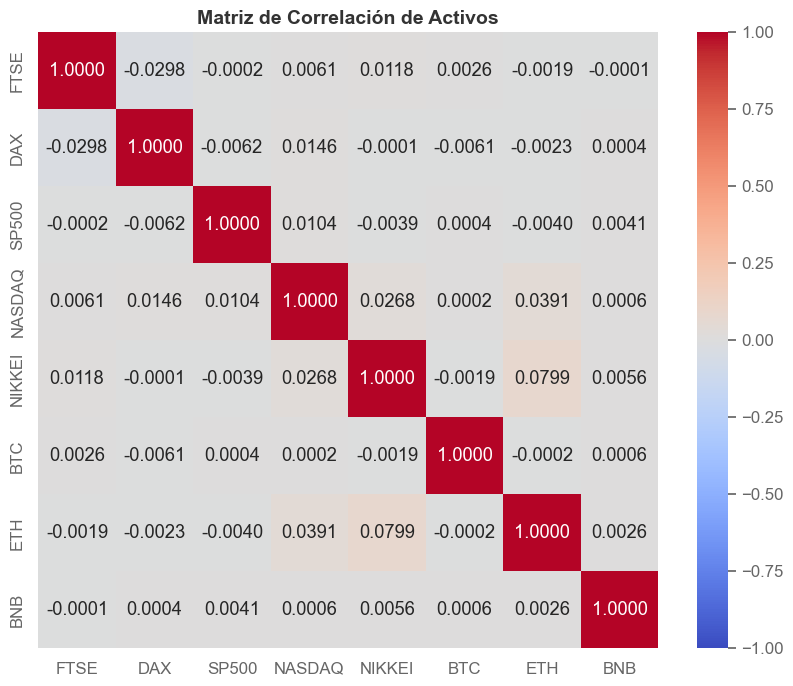

In [31]:
# Matriz de correlacion
graficar_matriz_correlacion(data_w_cripto.pct_change().dropna())

###### Grafica Pastel

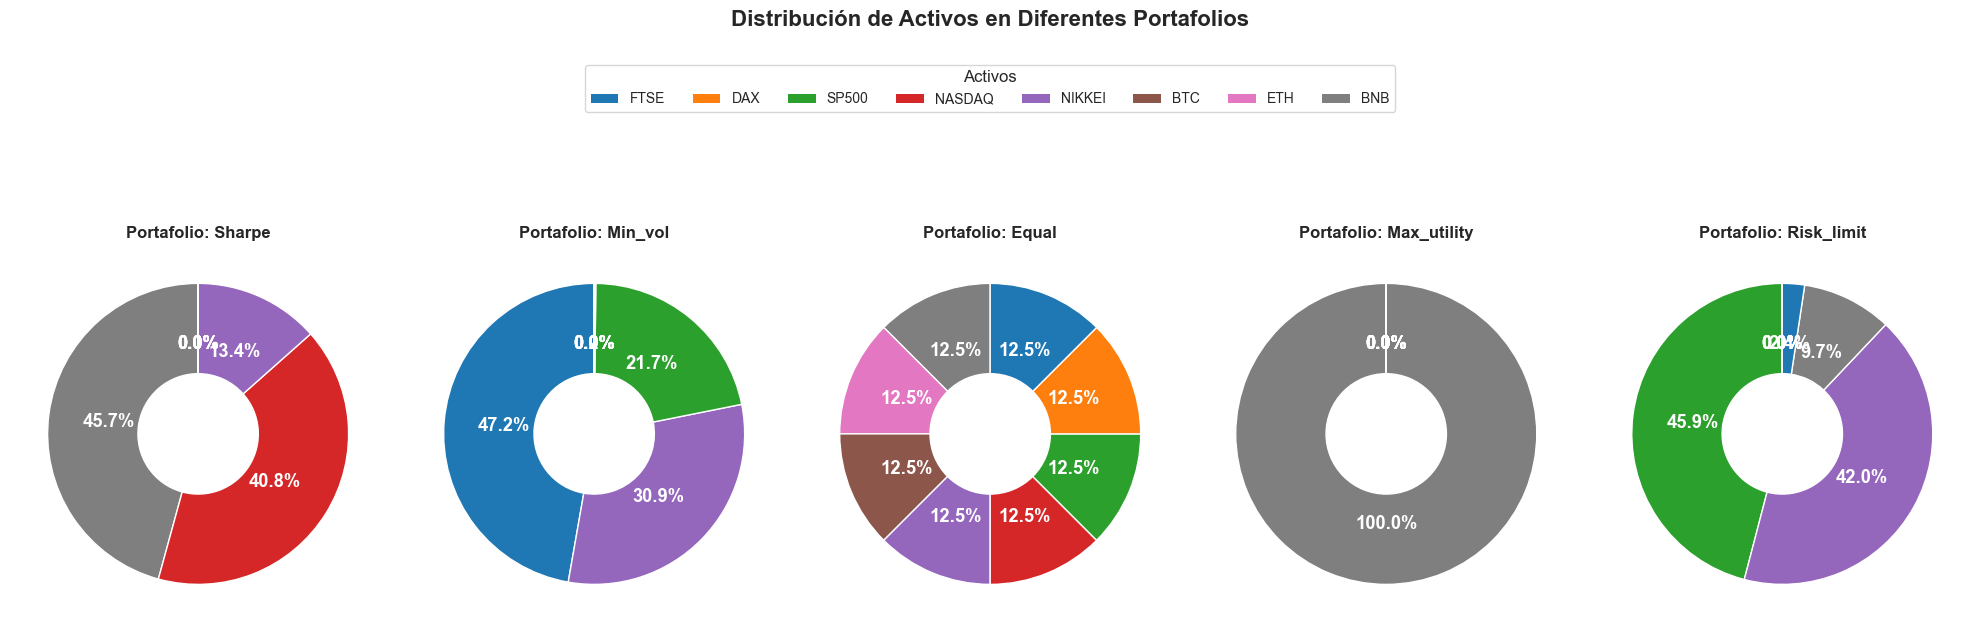

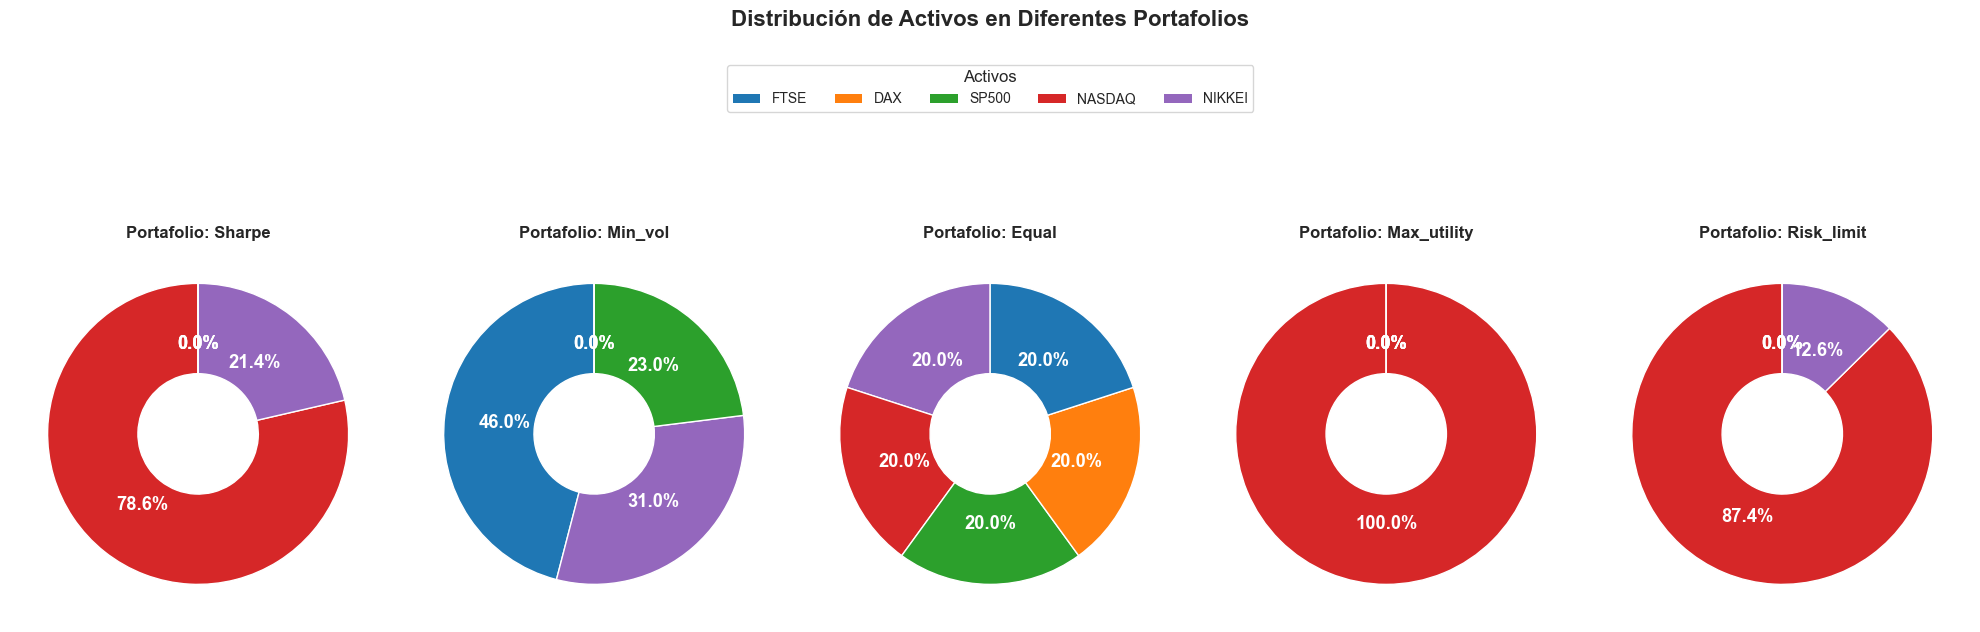

In [32]:
plot_portfolio_pies(data_w_cripto, risk_limit=0.2)
plot_portfolio_pies(data, risk_limit=0.2)

###### Frontera eficiente

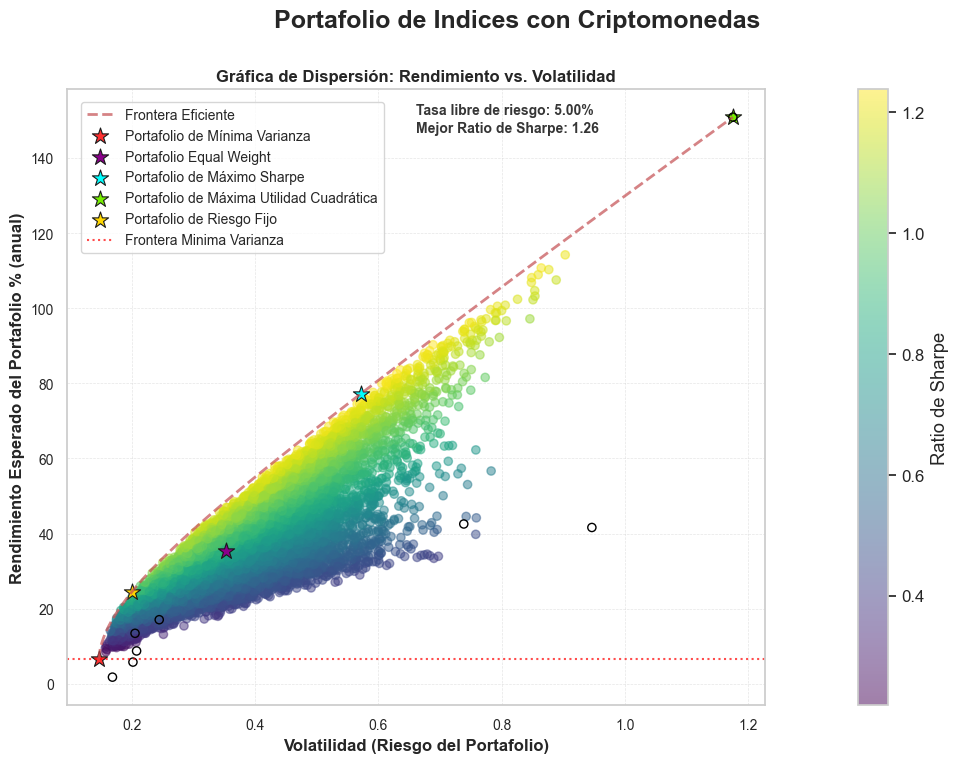

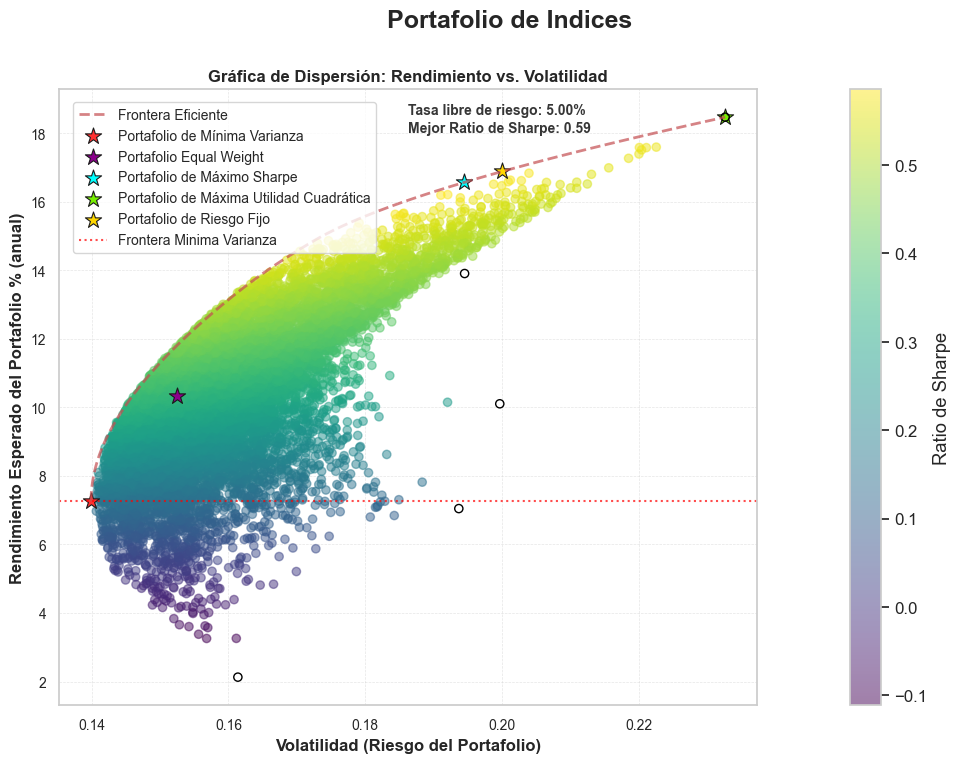

In [33]:
graficar_frontera_eficiente(data_w_cripto, risk_free=0.05, risk_limit=0.20, title='Portafolio de Indices con Criptomonedas')
graficar_frontera_eficiente(data, risk_free=0.05, risk_limit=0.20, title='Portafolio de Indices')

###### Rendimientos acumulados

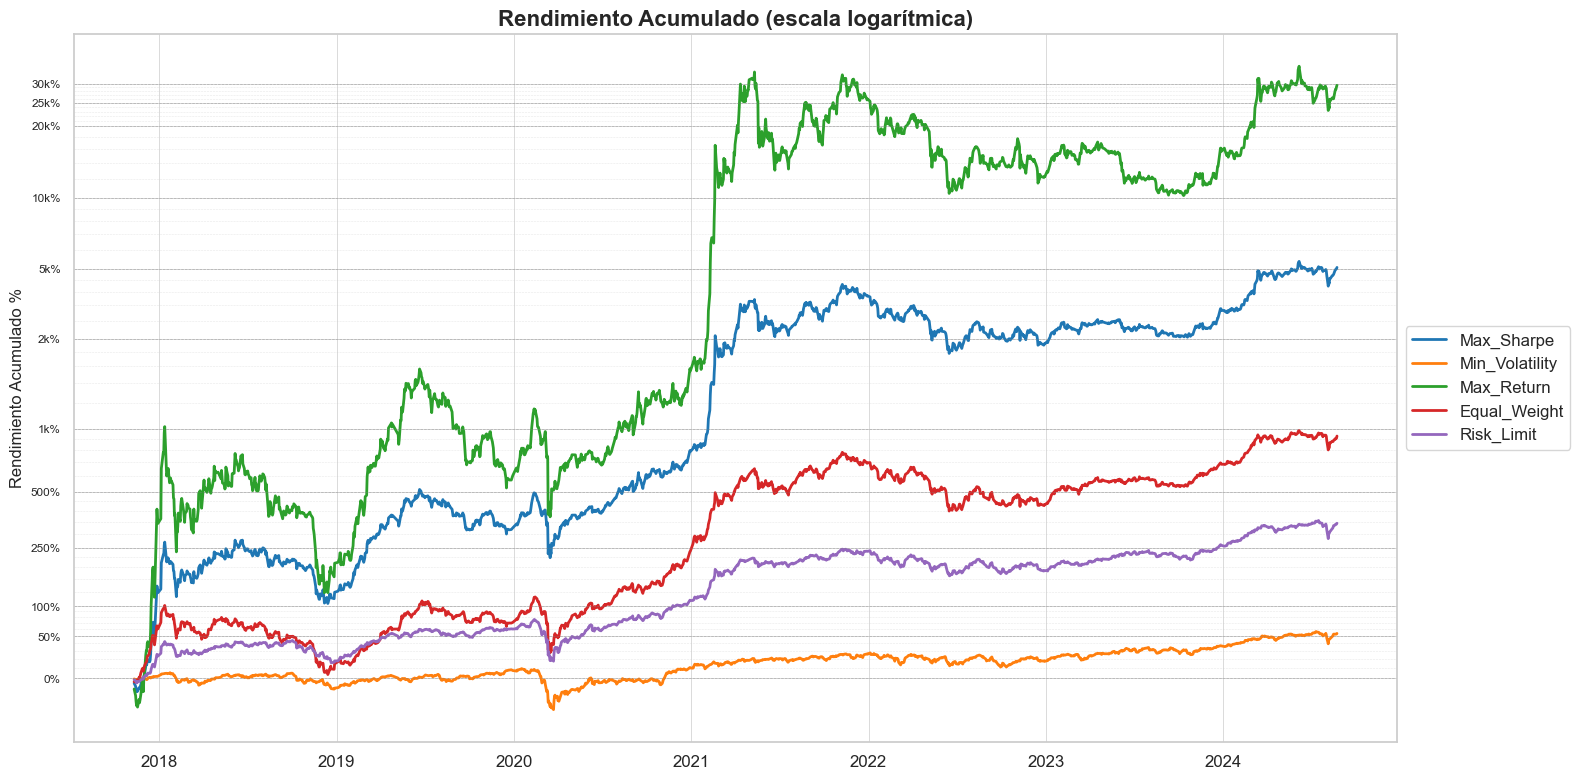

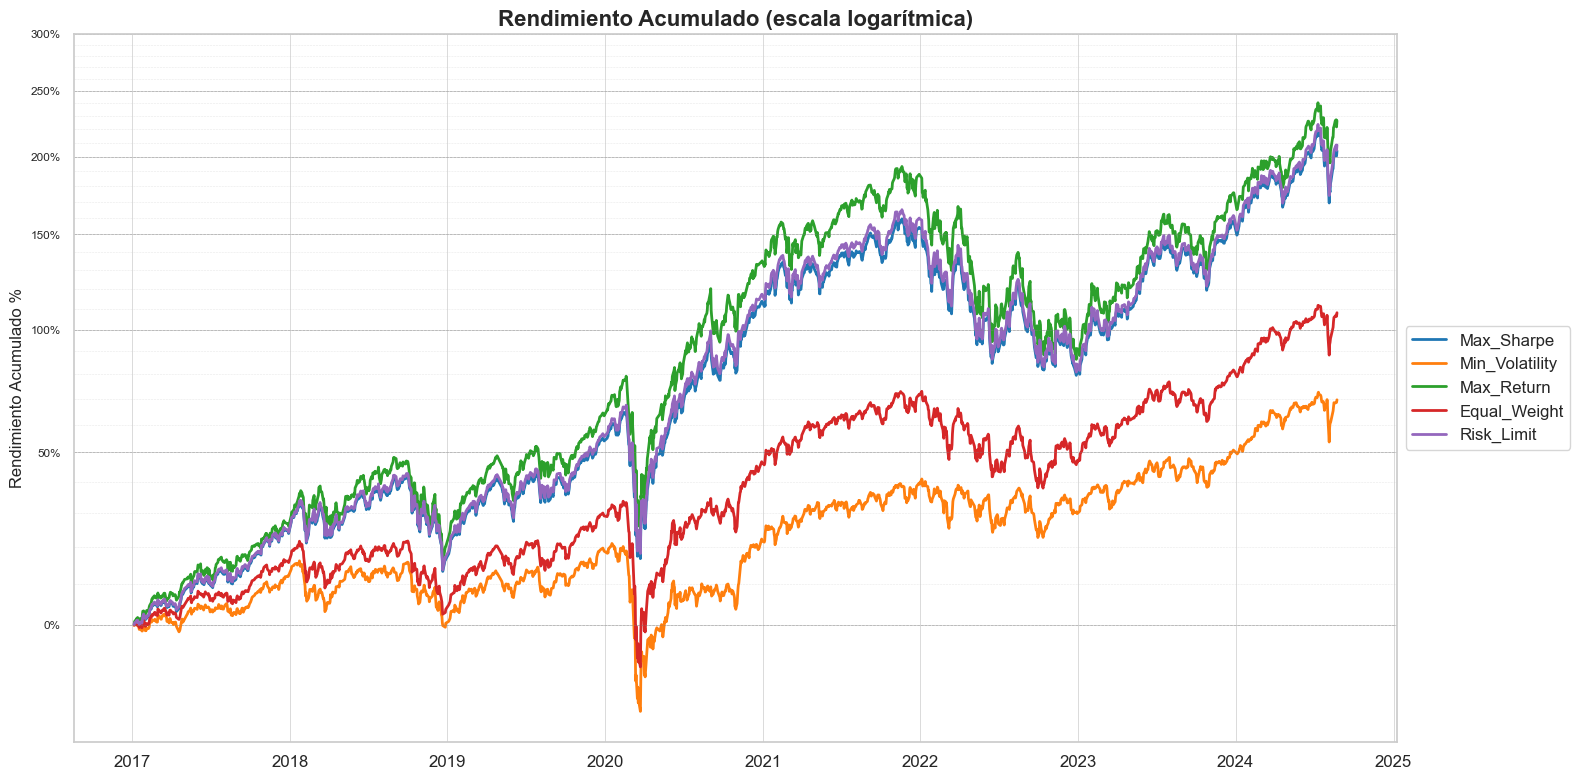

In [34]:
plot_cumulative_returns(data_w_cripto_port, yticks=[1,1.5, 2, 3.5, 6, 11, 26, 51, 101, 201, 251, 301], num_minor_ticks=4)
plot_cumulative_returns(data_port, yticks=[1,1.5, 2, 2.5, 3, 3.5, 4], num_minor_ticks=4)